# Import libraries and Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [3]:
heart_train = pd.read_csv("/kaggle/input/heartbeat/mitbih_train.csv", header=None )
heart_test = pd.read_csv("/kaggle/input/heartbeat/mitbih_test.csv", header=None)

In [4]:
heart_train

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


# Some Analysis

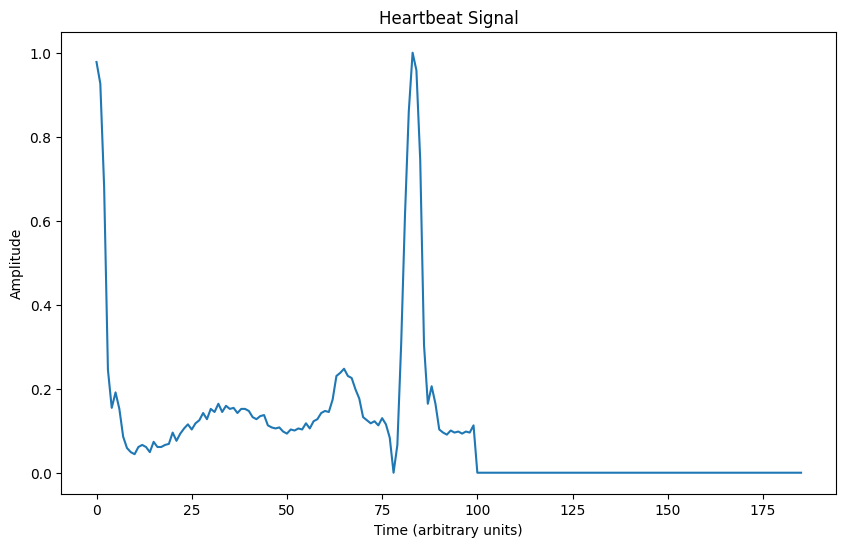

In [5]:
random_index = 0
signal = heart_train.iloc[random_index, :186] 

plt.figure(figsize=(10, 6))
plt.plot(signal)
plt.title('Heartbeat Signal')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Amplitude')
plt.show()

In [6]:
heart_train.iloc[:, -1].value_counts()

187
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: count, dtype: int64

In [7]:
heart_train.iloc[:, -1]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
87549    4.0
87550    4.0
87551    4.0
87552    4.0
87553    4.0
Name: 187, Length: 87554, dtype: float64

In [8]:
heart_train[187] = heart_train[187].astype(int)
heart_train[187].value_counts()

187
0    72471
4     6431
2     5788
1     2223
3      641
Name: count, dtype: int64

In [9]:
classes = {0: 'N', 1: 'S', 2: 'V', 3: 'F', 4: 'Q'}
class_names = {
    0: "Normal Beats",
    1: "Supraventricular Ectopy Beats",
    2: "Ventricular Ectopy Beats",
    3: "Fusion Beats",
    4: "Unclassifiable Beats"
}

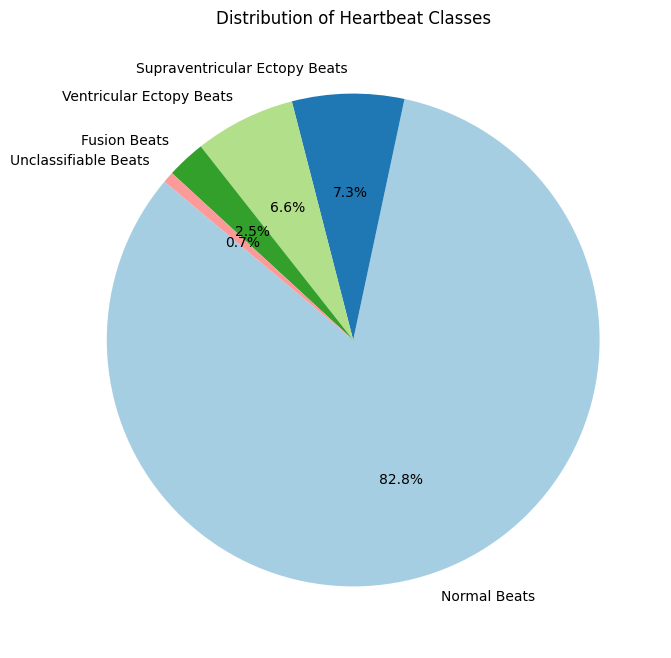

In [10]:
target_counts = heart_train[187].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=class_names.values(), autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

plt.title('Distribution of Heartbeat Classes')

plt.show()

# Modeling step

* Train the model on only firat 100 featurs

In [11]:
heart_train['binary_target'] = heart_train[187].apply(lambda x: 0 if x == 0 else 1)

In [76]:
binary_classifier = XGBClassifier(
    n_estimators=400,
    max_depth=30,
    learning_rate=0.03,
    booster="gbtree",
)

In [77]:
binary_classifier.fit(heart_train.iloc[:, :100], heart_train['binary_target'])

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=30, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [78]:
y_pred_binary = binary_classifier.predict(heart_train.iloc[:, :100])

In [79]:
def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [80]:
binary_cm = confusion_matrix(heart_train['binary_target'], y_pred_binary)
binary_acc = accuracy_score(heart_train['binary_target'], y_pred_binary)
binary_precision = precision_score(heart_train['binary_target'], y_pred_binary)
binary_recall = recall_score(heart_train['binary_target'], y_pred_binary)
binary_f1 = f1_score(heart_train['binary_target'], y_pred_binary)

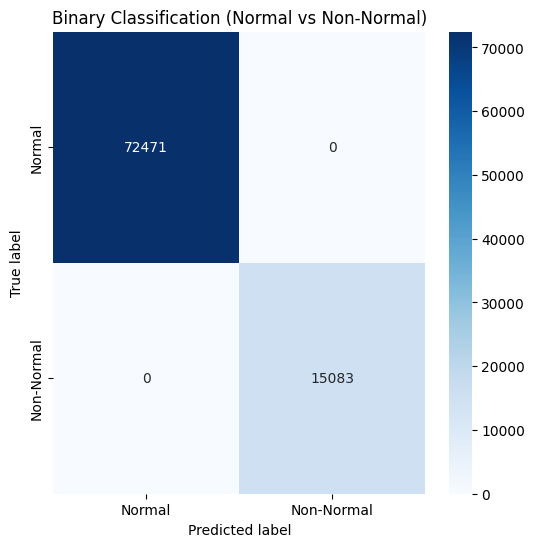

In [81]:
plot_confusion_matrix(binary_cm, classes=['Normal', 'Non-Normal'], title='Binary Classification (Normal vs Non-Normal)')

In [82]:
print("Binary Classification Metrics:")
print(f"Accuracy: {binary_acc:.2f}")
print(f"Precision: {binary_precision:.2f}")
print(f"Recall: {binary_recall:.2f}")
print(f"F1-Score: {binary_f1:.2f}")

Binary Classification Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00


In [83]:
from sklearn.ensemble import RandomForestClassifier

non_normal_samples = heart_train[heart_train[187] != 0]

In [85]:
X_multiclass = non_normal_samples.iloc[:, :100] 
y_multiclass = non_normal_samples[187]

In [86]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_multiclass = le.fit_transform(y_multiclass)

In [87]:
multiclass_classifier = XGBClassifier(
    n_estimators=400,
    max_depth=30,
    learning_rate=0.03,
    booster="gbtree"
)
multiclass_classifier.fit(X_multiclass, y_multiclass)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=30, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [88]:
y_pred_multiclass = multiclass_classifier.predict(X_multiclass)

multiclass_cm = confusion_matrix(y_pred_multiclass, y_multiclass)

multiclass_report = classification_report(y_multiclass, y_pred_multiclass, target_names=['S', 'V', 'F', 'Q'])

In [89]:
print(multiclass_report)

              precision    recall  f1-score   support

           S       1.00      1.00      1.00      2223
           V       1.00      1.00      1.00      5788
           F       1.00      1.00      1.00       641
           Q       1.00      1.00      1.00      6431

    accuracy                           1.00     15083
   macro avg       1.00      1.00      1.00     15083
weighted avg       1.00      1.00      1.00     15083



In [90]:
multiclass_cm = confusion_matrix(y_multiclass, y_pred_multiclass)

In [91]:
multiclass_report = classification_report(y_multiclass, y_pred_multiclass, target_names=['S', 'V', 'F', 'Q'])

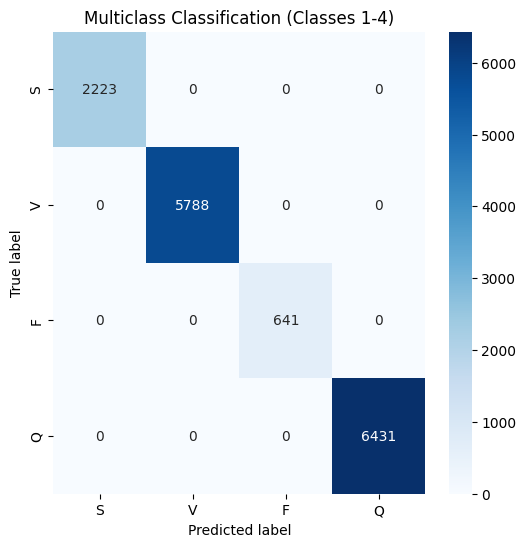

In [92]:
plot_confusion_matrix(multiclass_cm, classes=['S', 'V', 'F', 'Q'], title='Multiclass Classification (Classes 1-4)')

# Test set

In [93]:
y_pred_binary = binary_classifier.predict(heart_test.iloc[:, :100])

In [94]:
y_test = heart_test[187].apply(lambda x: 0 if x == 0 else 1)

In [95]:
binary_cm = confusion_matrix(y_test, y_pred_binary)
binary_acc = accuracy_score(y_test, y_pred_binary)
binary_precision = precision_score(y_test, y_pred_binary)
binary_recall = recall_score(y_test, y_pred_binary)
binary_f1 = f1_score(y_test, y_pred_binary)

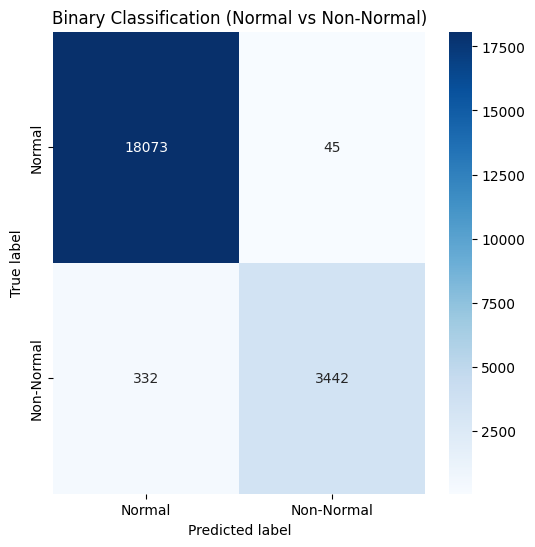

In [96]:
plot_confusion_matrix(binary_cm, classes=['Normal', 'Non-Normal'], title='Binary Classification (Normal vs Non-Normal)')

In [97]:
print("Binary Classification Metrics:")
print(f"Accuracy: {binary_acc:.2f}")
print(f"Precision: {binary_precision:.2f}")
print(f"Recall: {binary_recall:.2f}")
print(f"F1-Score: {binary_f1:.2f}")

Binary Classification Metrics:
Accuracy: 0.98
Precision: 0.99
Recall: 0.91
F1-Score: 0.95


In [98]:
heart_test[187] = heart_test[187].astype(int)

In [99]:
y_test_non_normal = heart_test[heart_test[187] != 0][187]

In [100]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_test_non_normal = le.fit_transform(y_test_non_normal)

In [101]:
y_pred_multiclass = multiclass_classifier.predict(heart_test[heart_test[187] != 0].iloc[:, :100])

multiclass_cm = confusion_matrix(y_test_non_normal, y_pred_multiclass)

multiclass_report = classification_report(y_test_non_normal, y_pred_multiclass, target_names=['S', 'V', 'F', 'Q'])

In [102]:
print(multiclass_report)

              precision    recall  f1-score   support

           S       0.97      0.94      0.95       556
           V       0.96      0.97      0.97      1448
           F       0.85      0.86      0.85       162
           Q       0.99      0.99      0.99      1608

    accuracy                           0.97      3774
   macro avg       0.94      0.94      0.94      3774
weighted avg       0.97      0.97      0.97      3774



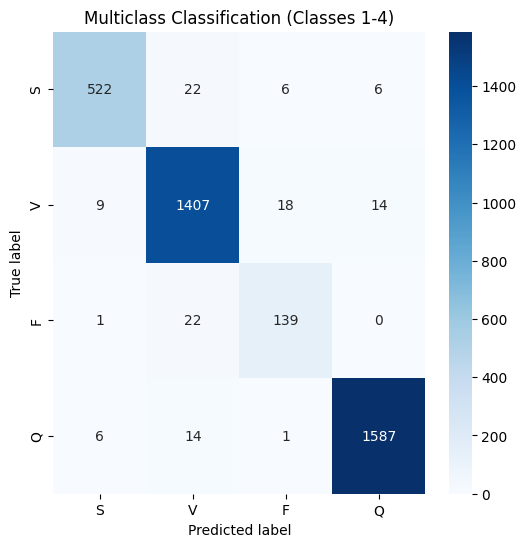

In [103]:
multiclass_cm = confusion_matrix(y_test_non_normal, y_pred_multiclass)
plot_confusion_matrix(multiclass_cm, classes=['S', 'V', 'F', 'Q'], title='Multiclass Classification (Classes 1-4)')

# Save the model

In [105]:
model_name = "binary_classifier_model.json"
binary_classifier.save_model(model_name)

In [106]:
model_name = "multiclass_classifier_model.json"
multiclass_classifier.save_model(model_name)